In [ ]:
# Importing all the required packages
import pandas as pd
import numpy as np
import os
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import joblib
import math
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Paths of different datasets
Crema_Path = r'/content/gdrive/MyDrive/Data 606 Project/Dataset/Crema'
Ravdess_Path=r'/content/gdrive/MyDrive/Data 606 Project/Dataset/Ravdess/audio_speech_actors_01-24'
Savee_Path=r'/content/gdrive/MyDrive/Data 606 Project/Dataset/Savee'
Tess_Path=r'/content/gdrive/MyDrive/Data 606 Project/Dataset/Tess'

In [ ]:
# Creating a list for crema with emotion and audio file path
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                                          File_Path
0     fear  /content/gdrive/MyDrive/Data 606 Project/Datas...
1    angry  /content/gdrive/MyDrive/Data 606 Project/Datas...
2  neutral  /content/gdrive/MyDrive/Data 606 Project/Datas...
3    angry  /content/gdrive/MyDrive/Data 606 Project/Datas...
4  disgust  /content/gdrive/MyDrive/Data 606 Project/Datas...

In [ ]:
# Unique Emotions in Crema
Crema_df['Emotion'].unique()

array(['fear', 'angry', 'neutral', 'disgust', 'sad', 'happy'],
      dtype=object)

In [ ]:
# Crema data shape
Crema_df.shape

(7462, 2)

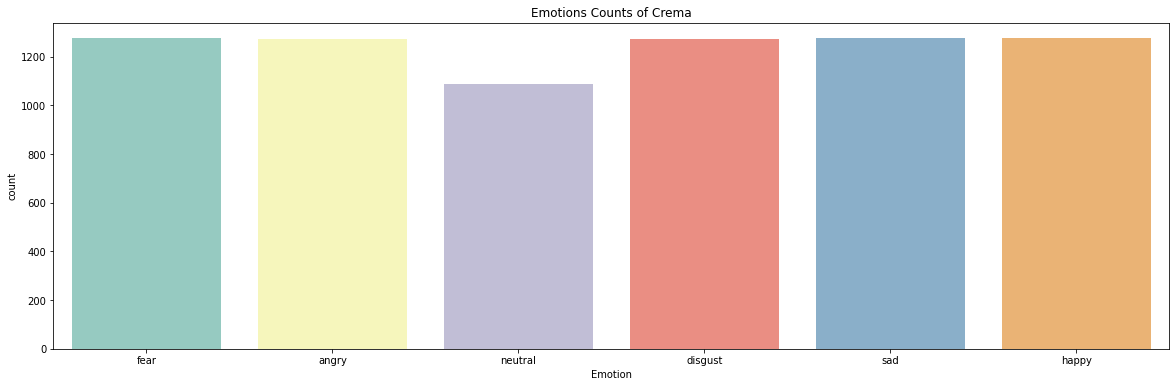

In [ ]:
# Emotion Distribution
plt.figure(figsize=(20,6))
plt.title('Emotions Counts of Crema')
emotions=sns.countplot(x='Emotion',data=Crema_df,palette='Set3')
emotions.set_xticklabels(emotions.get_xticklabels())
plt.show()

In [ ]:
# Null values if any,
print('Number of null Values in crema data set: ',Crema_df.isna().sum().sum())

Number of null Values in crema data set:  0


In [ ]:
# Dataframe information
Crema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    7462 non-null   object
 1   File_Path  7462 non-null   object
dtypes: object(2)
memory usage: 116.7+ KB


In [ ]:
# Creating a list for ravdess with emotion and audio file path
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()


Emotion                                          File_Path
0      sad  /content/gdrive/MyDrive/Data 606 Project/Datas...
1  disgust  /content/gdrive/MyDrive/Data 606 Project/Datas...
2     fear  /content/gdrive/MyDrive/Data 606 Project/Datas...
3    happy  /content/gdrive/MyDrive/Data 606 Project/Datas...
4  disgust  /content/gdrive/MyDrive/Data 606 Project/Datas...

In [ ]:
# Unique Emotions in Ravdess
Ravdess_df['Emotion'].unique()

array(['sad', 'disgust', 'fear', 'happy', 'neutral', 'angry', 'surprise'],
      dtype=object)

In [ ]:
# Ravdess file path size
Ravdess_df.shape

(1440, 2)

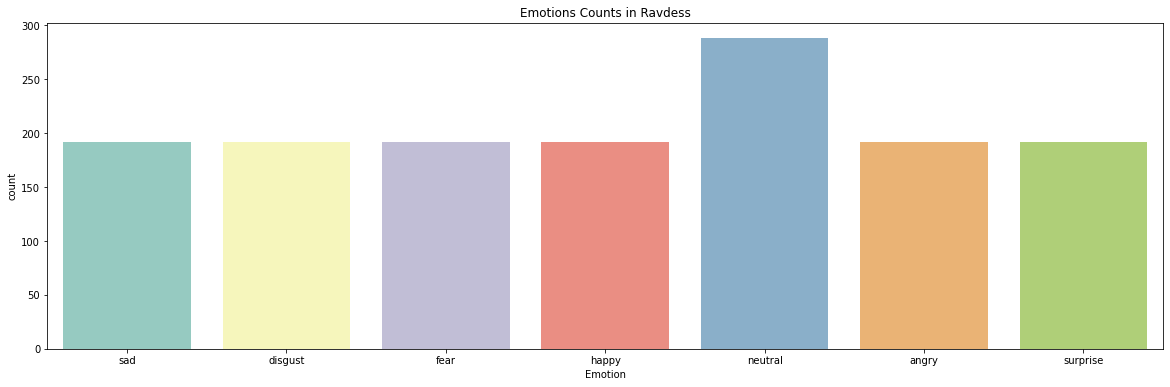

In [ ]:
# Emotion Distribution
plt.figure(figsize=(20,6))
plt.title('Emotions Counts in Ravdess')
emotions=sns.countplot(x='Emotion',data=Ravdess_df,palette='Set3')
emotions.set_xticklabels(emotions.get_xticklabels())
plt.show()

In [ ]:
# Null values if any,
print('Number of null Values in crema data set: ',Ravdess_df.isna().sum().sum())

Number of null Values in crema data set:  0


In [ ]:
# Dataframe information
Ravdess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    1440 non-null   object
 1   File_Path  1440 non-null   object
dtypes: object(2)
memory usage: 22.6+ KB


In [ ]:
# Creating a list for Savee with emotion and audio file path
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                                          File_Path
0  disgust  /content/gdrive/MyDrive/Data 606 Project/Datas...
1    angry  /content/gdrive/MyDrive/Data 606 Project/Datas...
2  disgust  /content/gdrive/MyDrive/Data 606 Project/Datas...
3  disgust  /content/gdrive/MyDrive/Data 606 Project/Datas...
4    angry  /content/gdrive/MyDrive/Data 606 Project/Datas...

In [ ]:
# Unique Emotions in Savee
Savee_df['Emotion'].unique()

array(['disgust', 'angry', 'happy', 'fear', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
#Savee list shape
Savee_df.shape

(480, 2)

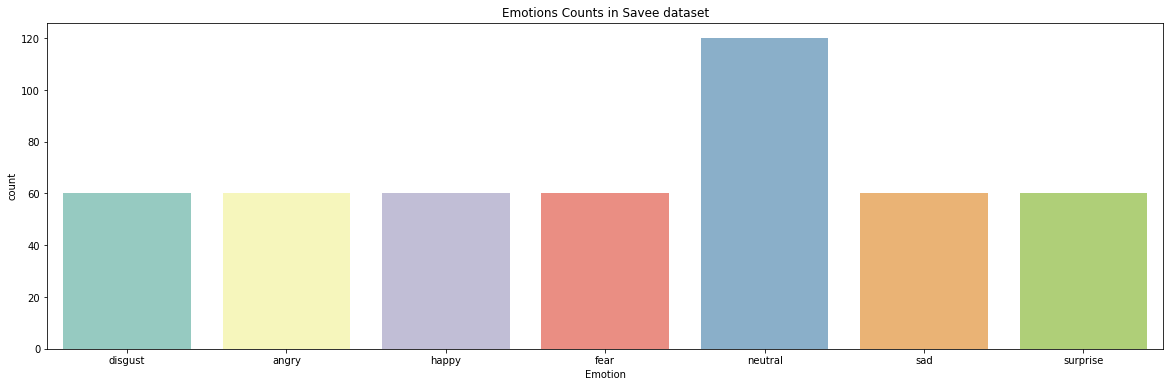

In [ ]:
# Emotion Distribution
plt.figure(figsize=(20,6))
plt.title('Emotions Counts in Savee dataset')
emotions=sns.countplot(x='Emotion',data=Savee_df,palette='Set3')
emotions.set_xticklabels(emotions.get_xticklabels())
plt.show()

In [ ]:
# Null values if any,
print('Number of null Values in crema data set: ',Savee_df.isna().sum().sum())

In [ ]:
# Dataframe information
Savee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    480 non-null    object
 1   File_Path  480 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB


In [ ]:
# Creating a list for tess with emotion and audio file path
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                          File_Path
0  surprise  /content/gdrive/MyDrive/Data 606 Project/Datas...
1  surprise  /content/gdrive/MyDrive/Data 606 Project/Datas...
2  surprise  /content/gdrive/MyDrive/Data 606 Project/Datas...
3  surprise  /content/gdrive/MyDrive/Data 606 Project/Datas...
4  surprise  /content/gdrive/MyDrive/Data 606 Project/Datas...

In [ ]:
Tess_df.loc[Tess_df["Emotion"] == 'neutral (1)'] = 'neutral'

In [ ]:
# Unique Emotions in tess
Tess_df['Emotion'].unique()

array(['surprise', 'happy', 'sad', 'neutral', 'angry', 'fear', 'disgust'],
      dtype=object)

In [ ]:
# Tess data file shape
Tess_df.shape

(2810, 2)

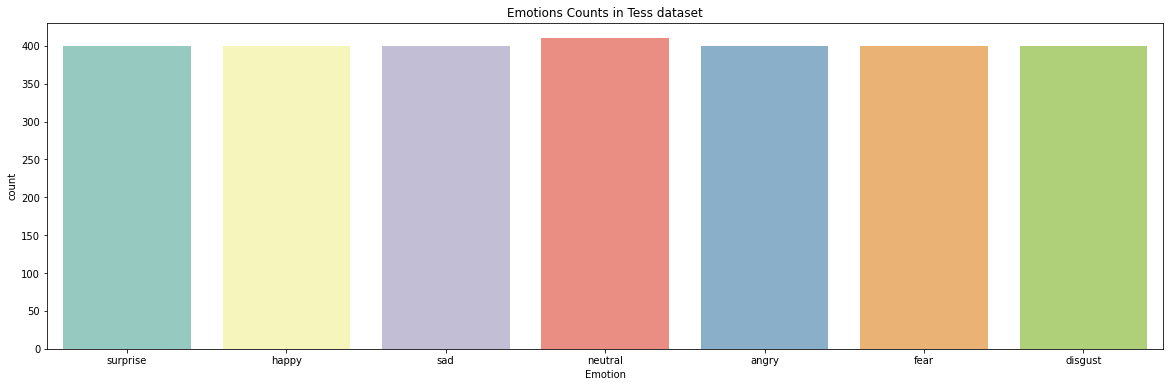

In [ ]:
# Emotion Distribution
plt.figure(figsize=(20,6))
plt.title('Emotions Counts in Tess dataset')
emotions=sns.countplot(x='Emotion',data=Tess_df,palette='Set3')
emotions.set_xticklabels(emotions.get_xticklabels())
plt.show()

In [ ]:
# Null values if any,
print('Number of null Values in crema data set: ',Tess_df.isna().sum().sum())

In [ ]:
# Dataframe information
Tess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    2810 non-null   object
 1   File_Path  2810 non-null   object
dtypes: object(2)
memory usage: 44.0+ KB


In [ ]:
# Combining all the datasets into a single pandas series
main_df = pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12192, 2)

In [ ]:
# Concatenated Dataframe contents
main_df.head()

Emotion                                          File_Path
0     fear  /content/gdrive/MyDrive/Data 606 Project/Datas...
1    angry  /content/gdrive/MyDrive/Data 606 Project/Datas...
2  neutral  /content/gdrive/MyDrive/Data 606 Project/Datas...
3    angry  /content/gdrive/MyDrive/Data 606 Project/Datas...
4  disgust  /content/gdrive/MyDrive/Data 606 Project/Datas...

In [ ]:
# Concatenated Datasets Unique Emotions
main_df['Emotion'].unique()

array(['fear', 'angry', 'neutral', 'disgust', 'sad', 'happy', 'surprise'],
      dtype=object)

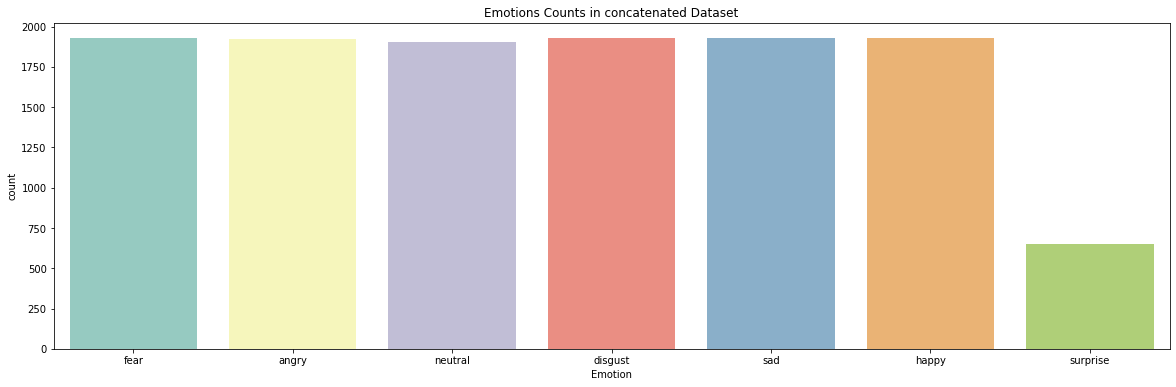

In [ ]:
# Emotion Distribution
plt.figure(figsize=(20,6))
plt.title('Emotions Counts in concatenated Dataset')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set3')
emotions.set_xticklabels(emotions.get_xticklabels())
plt.show()

In [ ]:
# Emotion names
emotion_names=main_df['Emotion'].unique()
emotion_names

array(['fear', 'angry', 'neutral', 'disgust', 'sad', 'happy', 'surprise'],
      dtype=object)

In [ ]:
# Unique color for each Emotion
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [ ]:
# Function to create waveplots  for the audio files
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(20,6))
    plt.title(f'{emotion} emotion for waveplot',size=18)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [ ]:
# Function to create spectogram for the audio files
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(20,6))
    plt.title(f'{emotion} emotion for spectogram',size=18)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

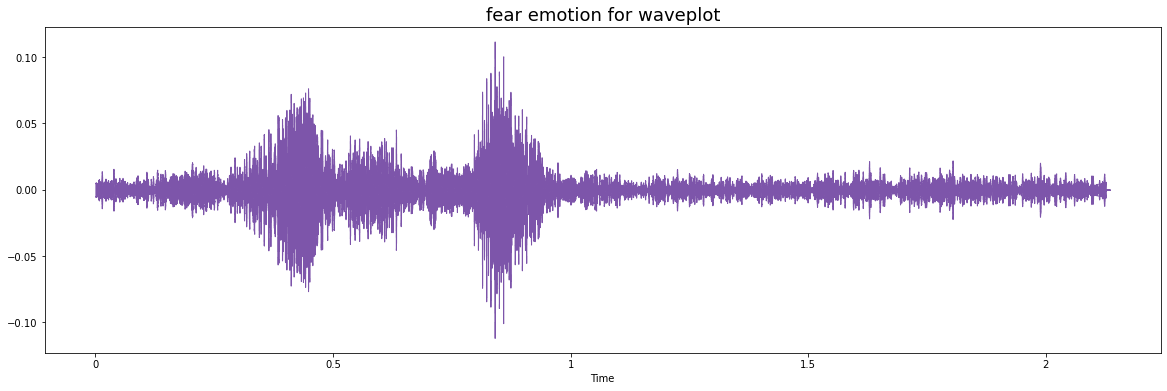

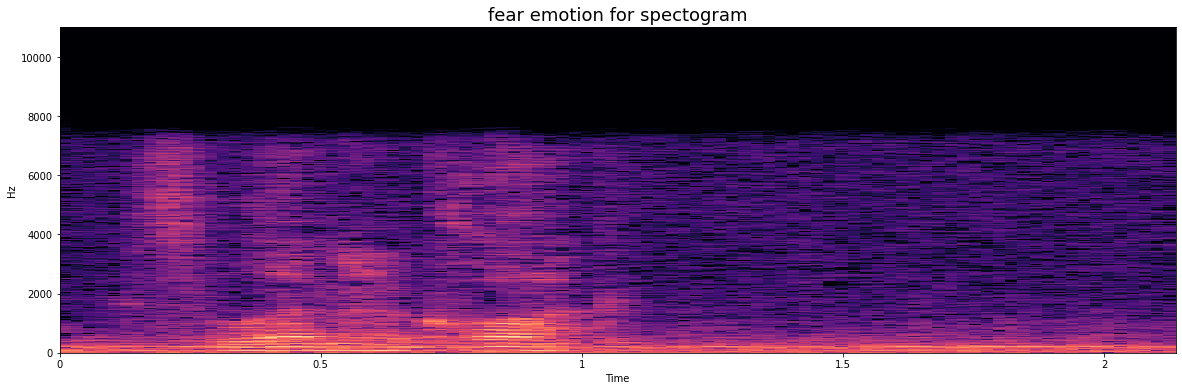

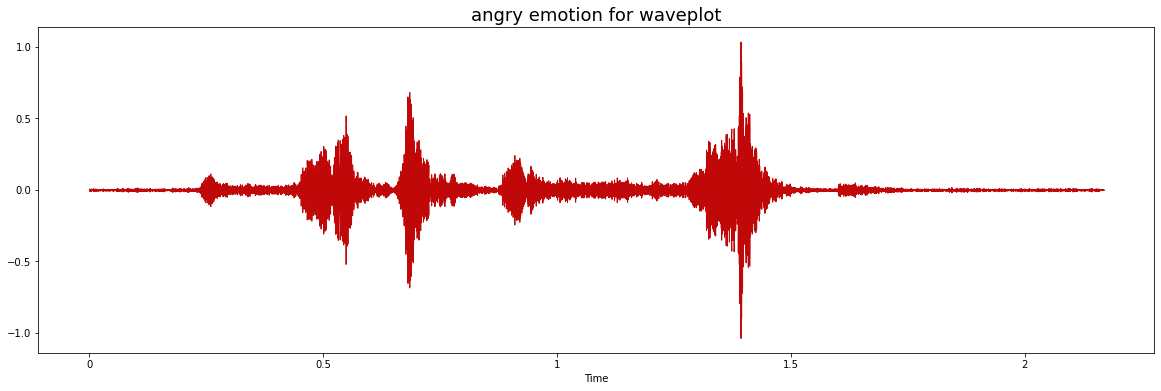

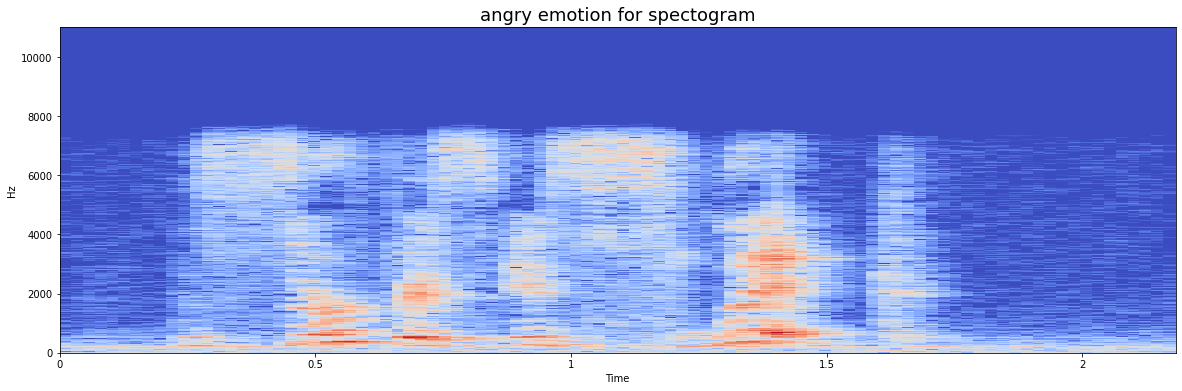

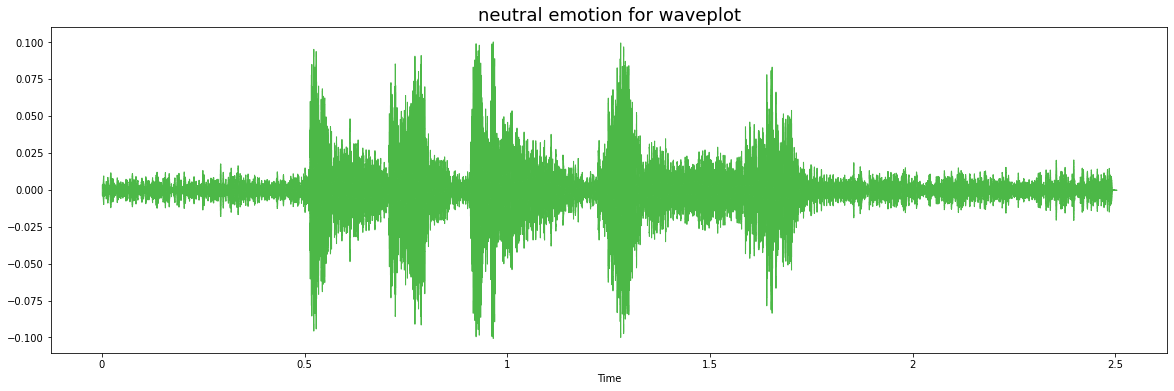

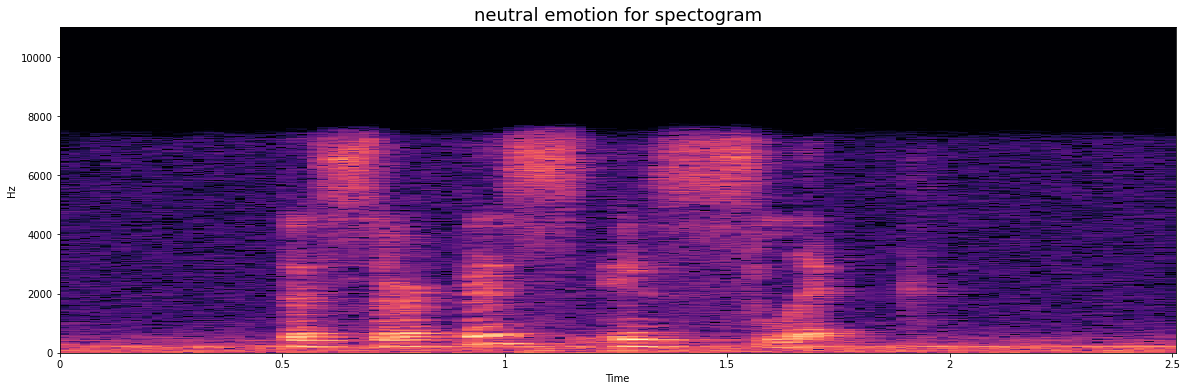

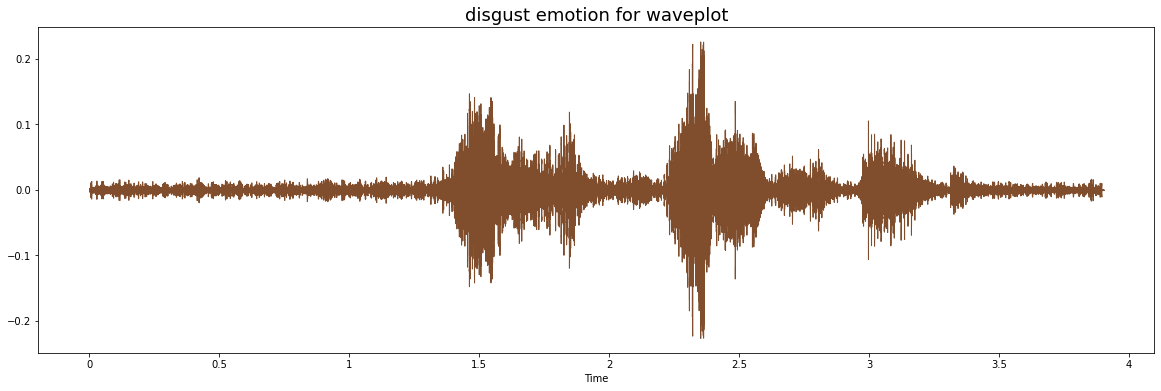

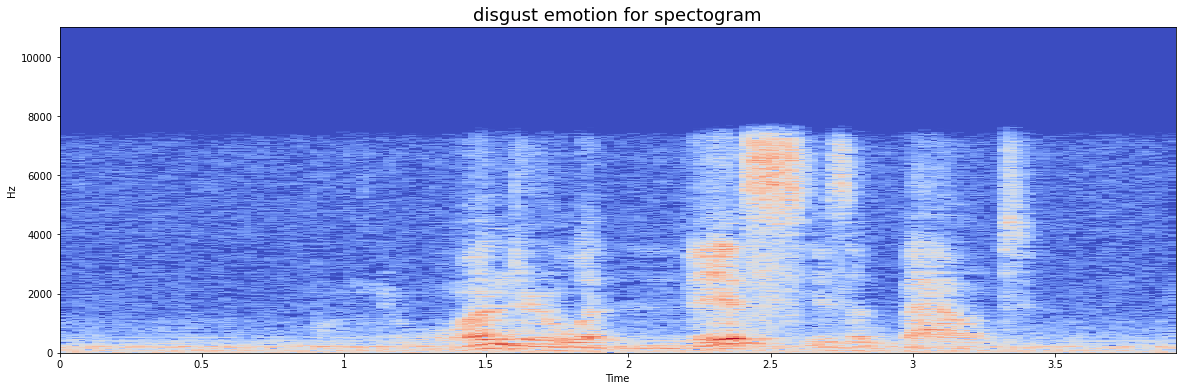

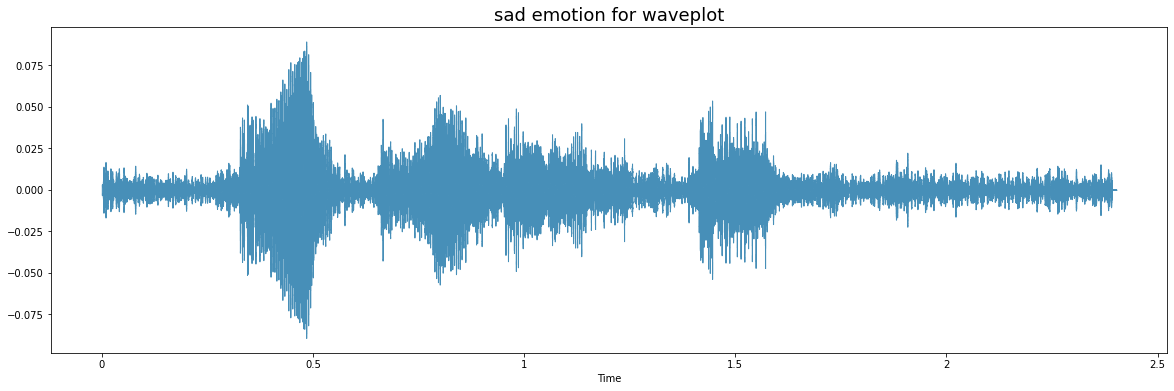

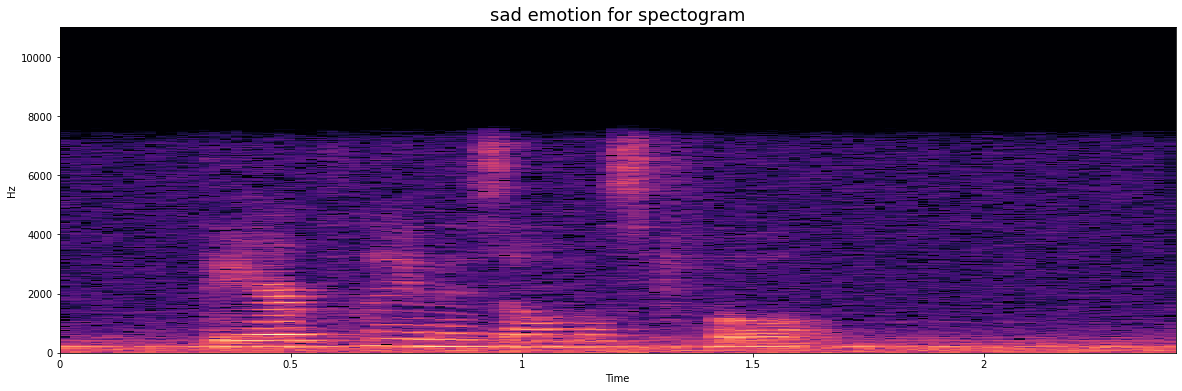

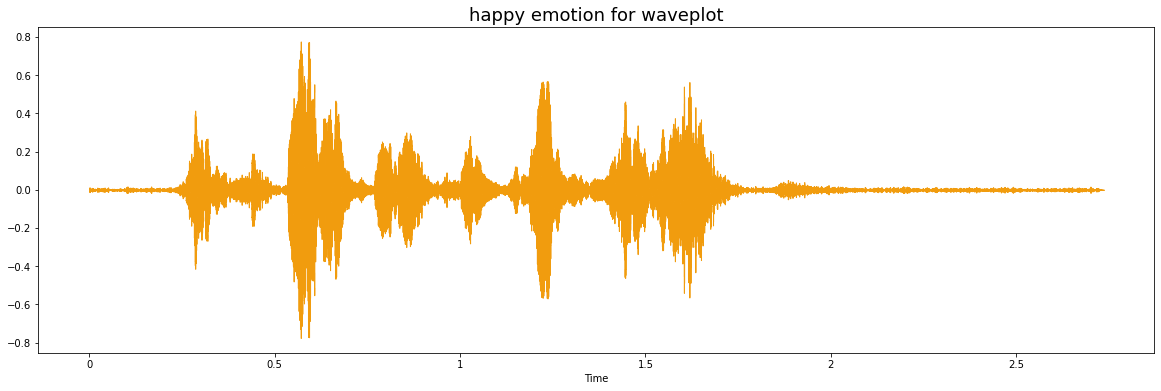

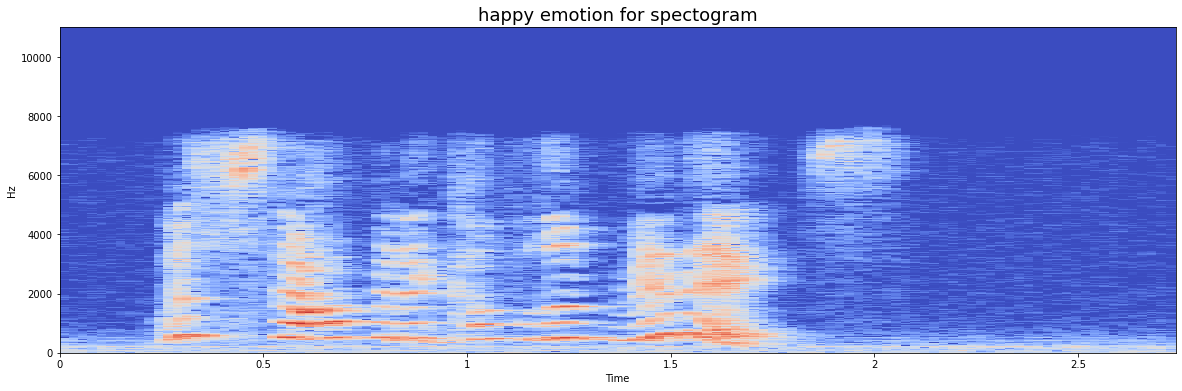

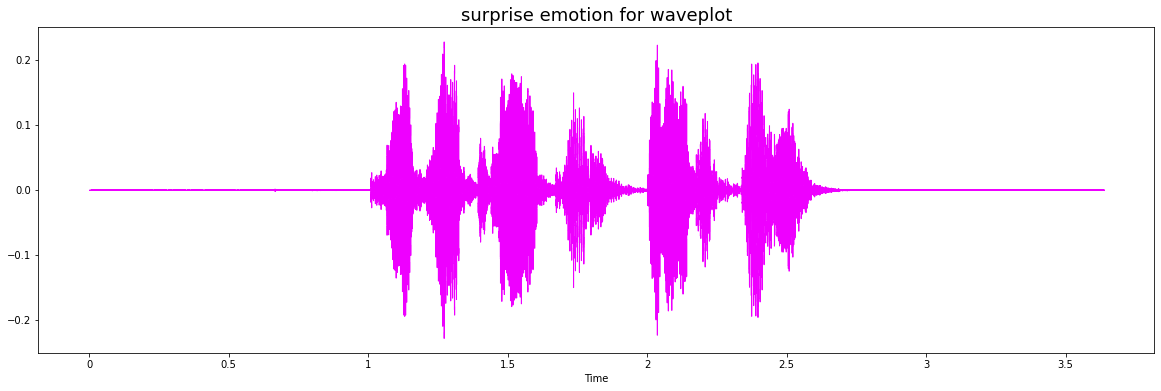

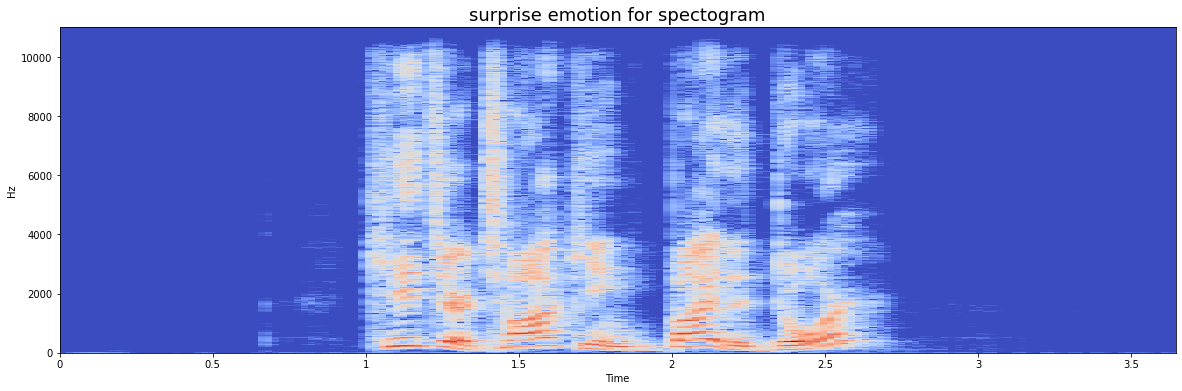

In [ ]:
# Creating feature graphs for the audio files
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [ ]:
# Audio sample for disgust emotion
print('Disgust Audio Sample\n\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample




In [ ]:
# Audio sample for happy emotion
print('Happy Audio Sample\n\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample




In [ ]:
# Audio sample for sad emotion
print('Sad Audio Sample\n\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample




In [ ]:
# Audio sample for neutral emotion
print('Neutral Audio Sample\n\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample




In [ ]:
# Audio sample for fear emotion
print('Fear Audio Sample\n\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample




In [ ]:
# Audio sample for angry emotion
print('Angry Audio Sample\n\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample




In [ ]:
# Audio sample for surprise emotion
print('Surprise Audio Sample\n\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample




In [ ]:
# Audio files processing step
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data,sr,pitch_factor)

def streching(data,rate=0.8):
  return librosa.effects.time_stretch(data,rate)

		 Original Audio



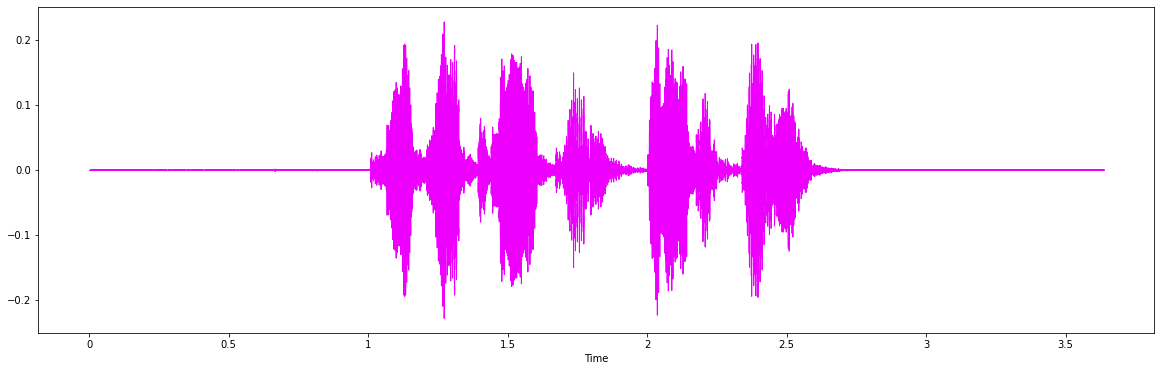

In [ ]:
# Original Audio Sample
print('\t\t Original Audio\n')
plt.figure(figsize=(20,6))
librosa.display.waveshow(data,sr,color='#EE00FF')
IPython.display.Audio(audio_path[6])

		 Noise Audio



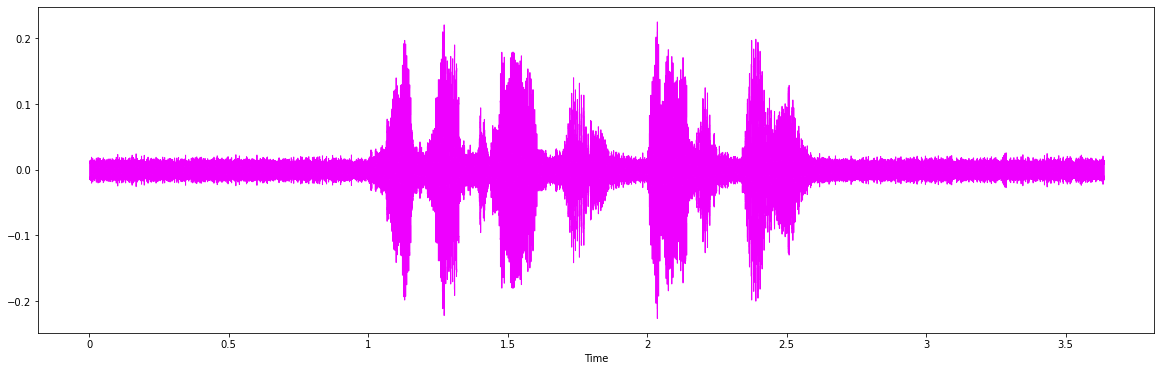

In [ ]:
# Orginal Audio + Noise
print('\t\t Noise Audio\n')
noised_audio=add_noise(data)
plt.figure(figsize=(20,6))
librosa.display.waveshow(noised_audio,sr,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)

		 Streched Audio



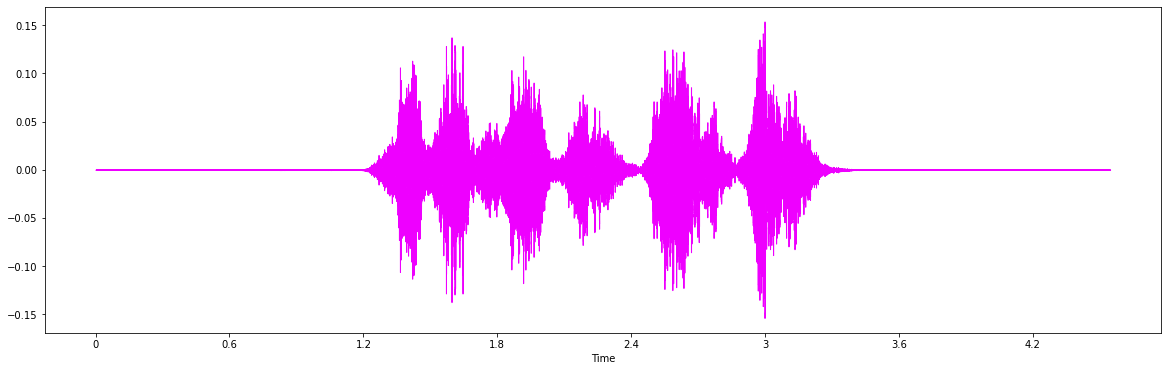

In [ ]:
# Orginal Audio + Streched
print('\t\t Streched Audio\n')
stretched_audio=streching(data)
plt.figure(figsize=(20,6))
librosa.display.waveshow(stretched_audio,sr,color='#EE00FF')
IPython.display.Audio(stretched_audio,rate=sr)

		 Shifted Audio



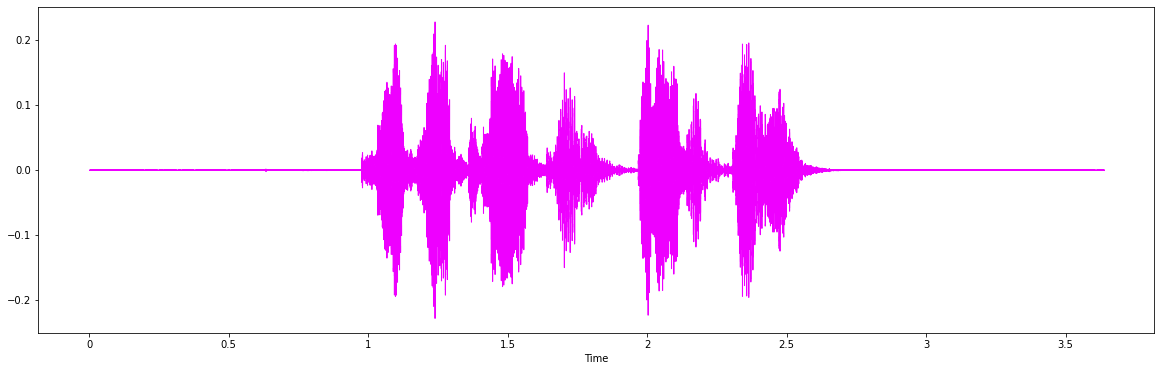

In [ ]:
# Orginal Audio + Shifted
print('\t\t Shifted Audio\n')
shifted_audio=shifting(data)
plt.figure(figsize=(20,6))
librosa.display.waveshow(shifted_audio,sr,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)

		 Pitched Audio



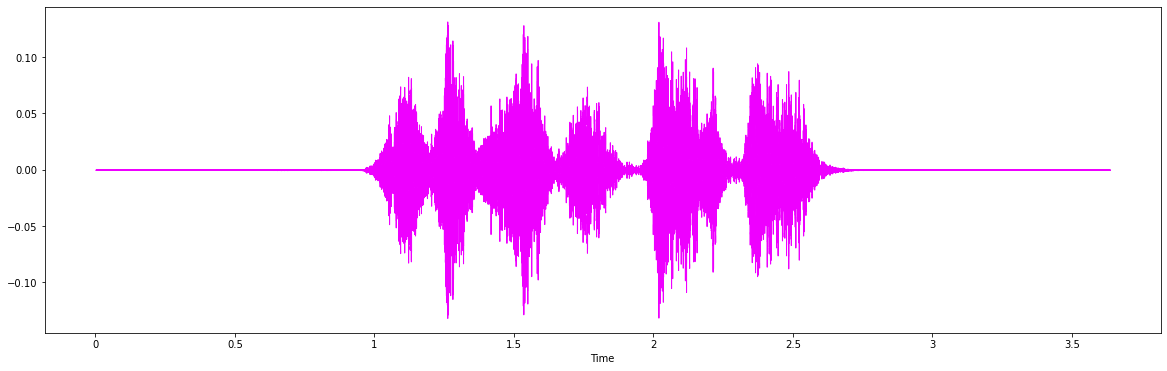

In [ ]:
# Orginal Audio + Pitch
print('\t\t Pitched Audio\n')
pitched_audio=pitching(data,sr)
plt.figure(figsize=(20,6))
librosa.display.waveshow(pitched_audio,sr,color='#EE00FF')
IPython.display.Audio(pitched_audio,rate=sr)

In [ ]:
# Audio files features extraction
def zcr(data):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=2048,hop_length=512)
    return np.array(np.squeeze(zcr))
def rms(data):
    rms=librosa.feature.rms(data,frame_length=2048,hop_length=512)
    return np.array(np.squeeze(rms))
def tonnetz(data,sr):
    tonnetz=librosa.feature.tonnetz(data,sr=sr)
    return np.array(np.ravel(tonnetz))
def mfcc(data,sr):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.array(np.ravel(mfcc.T))


#function to get features from MFCC, ZCR, RMS
def extract_features(data,sr):

    result=np.array([])
    result = np.append(result,mfcc(data,sr))
    result = np.append(result,tonnetz(data,sr))
    result = np.append(result, rms(data))
    result = np.append(result, zcr(data))
 
    return result

# Function to extract features from individual audio path
def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    
    return aud

In [ ]:
# Data preparation for testing and training
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_features(path)
    X.append(features)
    Y.append(emotion)
    if (index == main_df.File_Path.shape[0] -1):
      print('Features from all the audio files are extracted')

Features from all the audio files are extracted


In [ ]:
# Features extracted file from all the datasets
processed_data_path= '/content/gdrive/MyDrive/Data 606 Project/Project/Processed_Data.csv'

In [ ]:
# Converting X and Y arrays to CSV file and to be saved in specified path above
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

In [ ]:
# Converting features sile to dataframe
df=pd.read_csv(processed_data_path)
df.shape

(12193, 3025)

In [ ]:
# Contents of dataframe
df.head(5)

0           1          2          3          4          5  \
0 -482.195801  110.773117  51.111023  48.179424   0.194338  22.084517   
1 -278.479431  153.361481  50.661026  42.917492 -27.959963  18.591139   
2 -253.692902  111.659195 -32.278416  86.200516 -12.769146 -20.433407   
3 -318.371002  150.649719   3.282115   5.677013  -8.883451  10.485388   
4 -313.061890  150.304443 -36.473629  22.088251 -21.875429  17.876341   

           6          7          8          9  ...      3015      3016  \
0  -2.504833   7.144051   5.948255   6.084296  ...  0.044922  0.047852   
1 -15.680872   3.808071  -1.244905  -1.802984  ...       NaN       NaN   
2   3.616323   7.189594 -18.815210  -6.017754  ...       NaN       NaN   
3 -17.793518 -16.064016 -26.668098  12.010704  ...       NaN       NaN   
4 -48.037971 -16.381981 -22.397699   5.828568  ...  0.030273  0.029785   

       3017      3018      3019      3020      3021      3022      3023  \
0  0.040527  0.038086  0.034668  0.027832  0.029785  0.027832  0.017578   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4  0.036133  0.037109  0.041992  0.038574  0.033203  0.028320  0.015625   

   Emotion  
0     fear  
1    angry  
2  neutral  
3    angry  
4  disgust  

[5 rows x 3025 columns]

In [ ]:
# Removing all the null values and replacing with 0
df=df.fillna(0)
print('Number of null Values in data set: ',df.isna().sum().sum())
df.shape

Number of null Values in data set:  0


(12193, 3025)

In [ ]:
# Processed dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12193 entries, 0 to 12192
Columns: 3025 entries, 0 to Emotion
dtypes: float64(3024), object(1)
memory usage: 281.4+ MB


In [ ]:
# Creating X and Y variables for train and test split
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1, stratify = Y,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7315, 3024), (4878, 3024), (7315,), (4878,))

In [ ]:
# Accuracy of different models
models_accuracy_scores = []
model_names = ['SVC', 'SVC Tuned', 'MLPC', 'MLPC Tuned','KNN', 'KNN_Tuned','Decision Tree', 'Decision Tree Tuned', 'LR', 'LR Tuned', 'CNN', 'CNN Tuned']

In [ ]:
# Importing all the trained models
SVC_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_SVC_model.sav')
SVC_tuned_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_SVC_tuned_model.sav')   

MLPC_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_MLPC_model.sav')
MLPC_tuned_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_tuned_MLPC_model.sav')

KNN_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_KNN_model.sav')
KNN_tuned_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_KNN_tuned_model.sav')

Decision_Tree_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_DTC_model.sav')
Decision_Tree_tuned_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_DTC_tuned_model.sav')

Logistic_Regression_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_LR_model.sav')
Logistic_Regression_tuned_model = joblib.load(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_DTC_tuned_model.sav')

CNN_model = tf.keras.models.load_model(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_CNN_model.h5')
CNN_tuned_model = tf.keras.models.load_model(r'/content/gdrive/MyDrive/Data 606 Project/Project/models/finalized_CNN_tuned_model.h5')

In [ ]:
# Intinalizing scalar and fiting train and test data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [ ]:
# Predictions from SVC and MLPC models
y_pred1 = SVC_model.predict(X_test)
y_pred2 = SVC_tuned_model.predict(X_test) 

y_pred3 = MLPC_model.predict(X_test)
y_pred4 = MLPC_tuned_model.predict(X_test)

y_pred5 = KNN_model.predict(X_test)
y_pred6 = KNN_tuned_model.predict(X_test)

y_pred7 = Decision_Tree_model.predict(X_test)
y_pred8 = Decision_Tree_tuned_model.predict(X_test)

y_pred9 = Logistic_Regression_model.predict(X_test)
y_pred10 = Logistic_Regression_tuned_model.predict(X_test)

In [ ]:
# Classification report of SVC models
print(f'\t  SVC Model Classification Report\n\n',classification_report(y_test,y_pred1,target_names=emotion_names))
print('----------------------------------------------------------------------')
print(f'\t SVC tuned Model Classification Report\n\n',classification_report(y_test,y_pred2,target_names=emotion_names))
print('----------------------------------------------------------------------')

	  SVC Model Classification Report

               precision    recall  f1-score   support

        fear       0.77      0.85      0.81       756
       angry       0.75      0.67      0.71       759
     neutral       0.78      0.56      0.66       759
     disgust       0.69      0.74      0.71       759
         sad       0.70      0.75      0.72       744
       happy       0.72      0.81      0.76       840
    surprise       0.94      0.95      0.94       261

    accuracy                           0.74      4878
   macro avg       0.76      0.76      0.76      4878
weighted avg       0.75      0.74      0.74      4878

----------------------------------------------------------------------
	 SVC tuned Model Classification Report

               precision    recall  f1-score   support

        fear       0.98      0.12      0.22       756
       angry       0.95      0.07      0.13       759
     neutral       0.95      0.09      0.17       759
     disgust       0.76      0.07   

In [ ]:
# Classification report of  MLPC models
print(f'\t  MLPC Model Classification Report\n\n',classification_report(y_test,y_pred3,target_names=emotion_names))
print('----------------------------------------------------------------------')
print(f'\t MLPC  tuned Model Classification Report\n\n',classification_report(y_test,y_pred4,target_names=emotion_names))
print('----------------------------------------------------------------------')

	  MLPC Model Classification Report

               precision    recall  f1-score   support

        fear       0.91      0.91      0.91       756
       angry       0.87      0.89      0.88       759
     neutral       0.88      0.87      0.88       759
     disgust       0.89      0.88      0.89       759
         sad       0.90      0.90      0.90       744
       happy       0.91      0.91      0.91       840
    surprise       0.93      0.95      0.94       261

    accuracy                           0.90      4878
   macro avg       0.90      0.90      0.90      4878
weighted avg       0.90      0.90      0.90      4878

----------------------------------------------------------------------
	 MLPC  tuned Model Classification Report

               precision    recall  f1-score   support

        fear       0.92      0.91      0.91       756
       angry       0.88      0.88      0.88       759
     neutral       0.89      0.87      0.88       759
     disgust       0.89      0.89

In [ ]:
# Classification report of  KNN models
print(f'\t  KNN Model Classification Report\n\n',classification_report(y_test,y_pred5,target_names=emotion_names))
print('----------------------------------------------------------------------')
print(f'\t KNN  tuned Model Classification Report\n\n',classification_report(y_test,y_pred6,target_names=emotion_names))
print('----------------------------------------------------------------------')

	  KNN Model Classification Report

               precision    recall  f1-score   support

        fear       0.74      0.60      0.67       756
       angry       0.59      0.53      0.56       759
     neutral       0.49      0.56      0.53       759
     disgust       0.67      0.47      0.55       759
         sad       0.63      0.59      0.61       744
       happy       0.52      0.78      0.62       840
    surprise       0.82      0.77      0.79       261

    accuracy                           0.60      4878
   macro avg       0.64      0.61      0.62      4878
weighted avg       0.62      0.60      0.60      4878

----------------------------------------------------------------------
	 KNN  tuned Model Classification Report

               precision    recall  f1-score   support

        fear       0.96      0.87      0.91       756
       angry       0.93      0.85      0.89       759
     neutral       0.88      0.87      0.87       759
     disgust       0.92      0.86  

In [ ]:
# Classification report of  DTC models
print(f'\t  Decision Tree Model Classification Report\n\n',classification_report(y_test,y_pred7,target_names=emotion_names))
print('----------------------------------------------------------------------')
print(f'\t Decision Tree  tuned Model Classification Report\n\n',classification_report(y_test,y_pred8,target_names=emotion_names))
print('----------------------------------------------------------------------')

	  Decision Tree Model Classification Report

               precision    recall  f1-score   support

        fear       0.77      0.82      0.80       756
       angry       0.77      0.75      0.76       759
     neutral       0.70      0.70      0.70       759
     disgust       0.76      0.73      0.74       759
         sad       0.70      0.74      0.72       744
       happy       0.75      0.83      0.79       840
    surprise       0.78      0.44      0.57       261

    accuracy                           0.75      4878
   macro avg       0.75      0.72      0.73      4878
weighted avg       0.75      0.75      0.74      4878

----------------------------------------------------------------------
	 Decision Tree  tuned Model Classification Report

               precision    recall  f1-score   support

        fear       0.87      0.85      0.86       756
       angry       0.82      0.80      0.81       759
     neutral       0.78      0.81      0.79       759
     disgust   

In [ ]:
# Classification report of  LR models
print(f'\t  Logistic Regression Model Classification Report\n\n',classification_report(y_test,y_pred9,target_names=emotion_names))
print('----------------------------------------------------------------------')
print(f'\t Logistic Regression  tuned Model Classification Report\n\n',classification_report(y_test,y_pred10,target_names=emotion_names))
print('----------------------------------------------------------------------')

	  Logistic Regression Model Classification Report

               precision    recall  f1-score   support

        fear       0.82      0.82      0.82       756
       angry       0.74      0.72      0.73       759
     neutral       0.68      0.67      0.67       759
     disgust       0.73      0.73      0.73       759
         sad       0.73      0.74      0.73       744
       happy       0.79      0.80      0.80       840
    surprise       0.92      0.93      0.93       261

    accuracy                           0.76      4878
   macro avg       0.77      0.77      0.77      4878
weighted avg       0.76      0.76      0.76      4878

----------------------------------------------------------------------
	 Logistic Regression  tuned Model Classification Report

               precision    recall  f1-score   support

        fear       0.87      0.85      0.86       756
       angry       0.82      0.80      0.81       759
     neutral       0.78      0.81      0.79       759
   

In [ ]:
# Accuracy of SVC model
accuracy=accuracy_score(y_pred1,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of SVC Model: {accuracy}')

Accuracy Score of SVC Model: 0.7429274292742928


In [ ]:
# Accuracy of SVC tuned model
accuracy=accuracy_score(y_pred2,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of SVC Tuned Model: {accuracy}')

Accuracy Score of SVC Tuned Model: 0.24026240262402623


In [ ]:
# Accuracy of MLPC model
accuracy=accuracy_score(y_pred3,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of MLPC Model: {accuracy}')

Accuracy Score of MLPC Model: 0.8970889708897088


In [ ]:
# Accuracy of MLPC tuned model
accuracy=accuracy_score(y_pred4,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of MLPC Tuned Model: {accuracy}')

Accuracy Score of MLPC Tuned Model: 0.8997539975399754


In [ ]:
# Accuracy of KNN model
accuracy=accuracy_score(y_pred5,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of KNN Model: {accuracy}')

Accuracy Score of KNN Model: 0.6008610086100861


In [ ]:
# Accuracy of KNN model
accuracy=accuracy_score(y_pred6,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of KNN Tuned Model: {accuracy}')

Accuracy Score of KNN Tuned Model: 0.8847888478884789


In [ ]:
# Accuracy of DTC model
accuracy=accuracy_score(y_pred7,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of Decision Tree Model: {accuracy}')

Accuracy Score of Decision Tree Model: 0.7451824518245183


In [ ]:
# Accuracy of DTC Tuned model
accuracy=accuracy_score(y_pred8,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of Decision Tree Tuned Model: {accuracy}')

Accuracy Score of Decision Tree Tuned Model: 0.8349733497334973


In [ ]:
# Accuracy of LR model
accuracy=accuracy_score(y_pred9,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of LR Model: {accuracy}')

Accuracy Score of LR Model: 0.7568675686756867


In [ ]:
# Accuracy of LR Tuned model
accuracy=accuracy_score(y_pred10,y_test)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of LR Tuned Model: {accuracy}')

Accuracy Score of LR Tuned Model: 0.8349733497334973


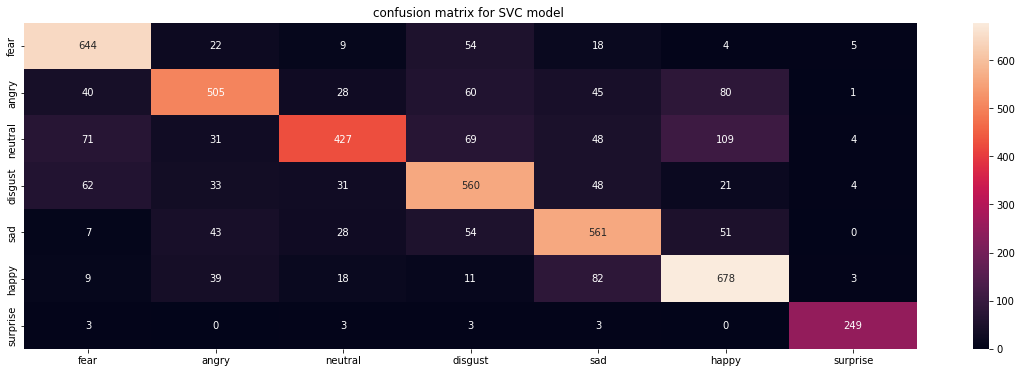

In [ ]:
# Confusion matrix of SVC
conf=confusion_matrix(y_test,y_pred1)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for SVC model ')
plt.show()

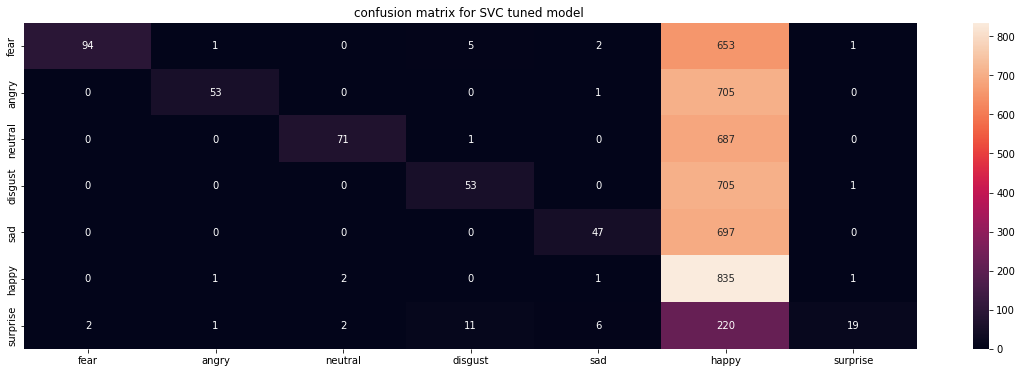

In [ ]:
# Confusion matrix of SVC tuned model
conf=confusion_matrix(y_test,y_pred2)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for SVC tuned model ')
plt.show()

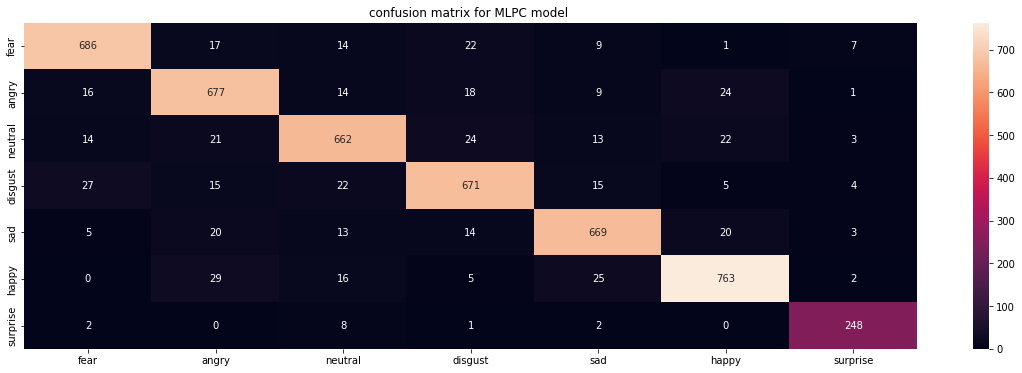

In [ ]:
# Confusion matrix of MLPC model
conf=confusion_matrix(y_test,y_pred3)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for MLPC model ')
plt.show()

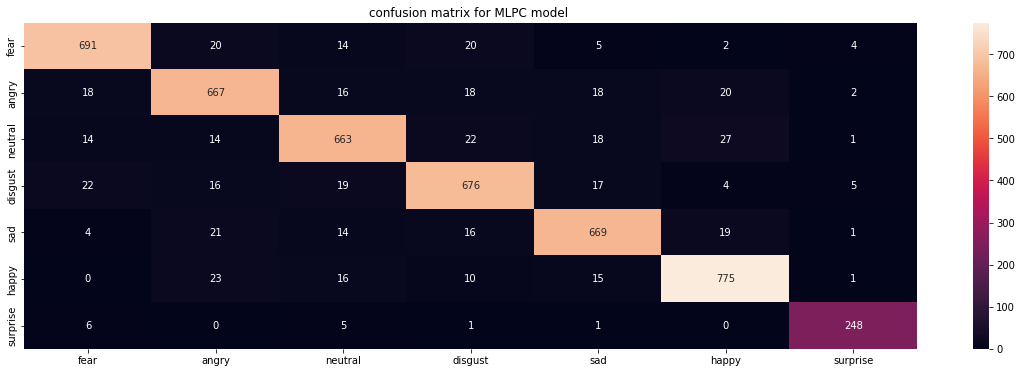

In [ ]:
# Confusion matrix of MLPC tuned model
conf=confusion_matrix(y_test,y_pred4)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for MLPC model ')
plt.show()

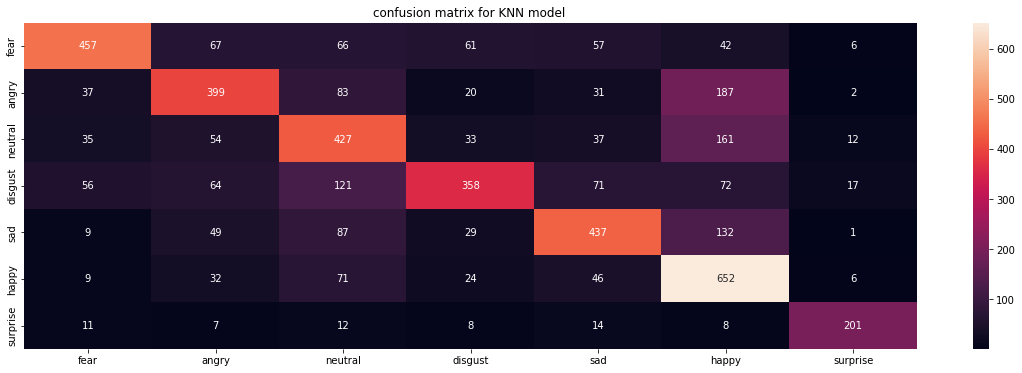

In [ ]:
# Confusion matrix of KNN model
conf=confusion_matrix(y_test,y_pred5)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for KNN model ')
plt.show()

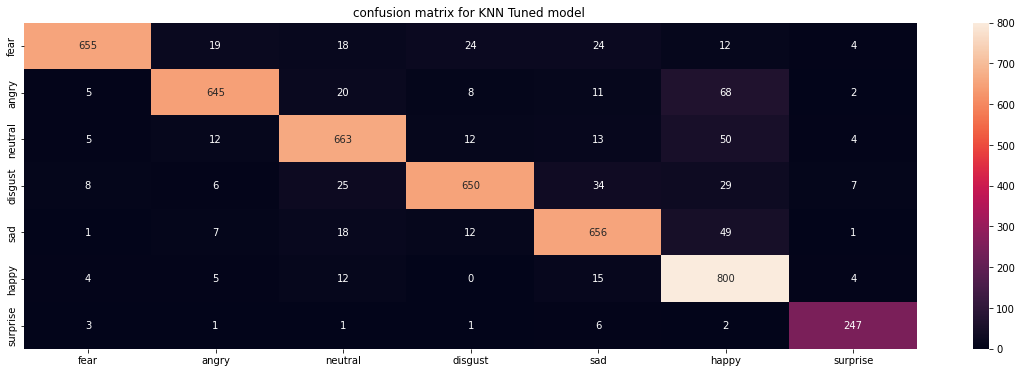

In [ ]:
# Confusion matrix of KNN Tuned model
conf=confusion_matrix(y_test,y_pred6)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for KNN Tuned model ')
plt.show()

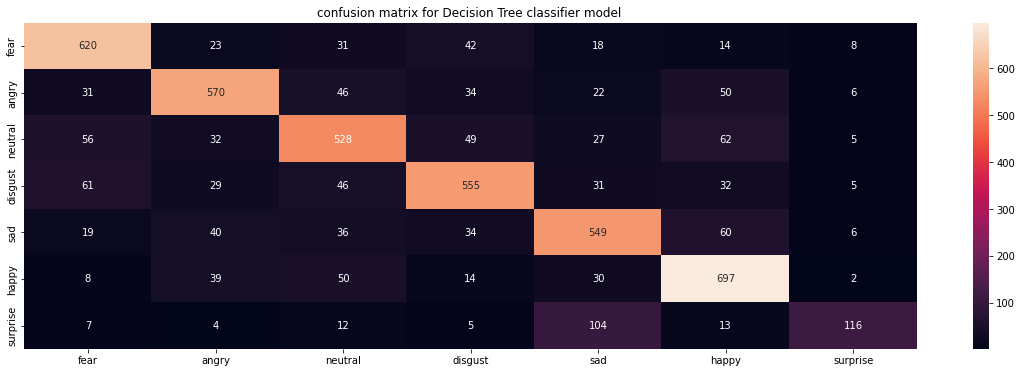

In [ ]:
# Confusion matrix of DTC model
conf=confusion_matrix(y_test,y_pred7)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for Decision Tree classifier model ')
plt.show()

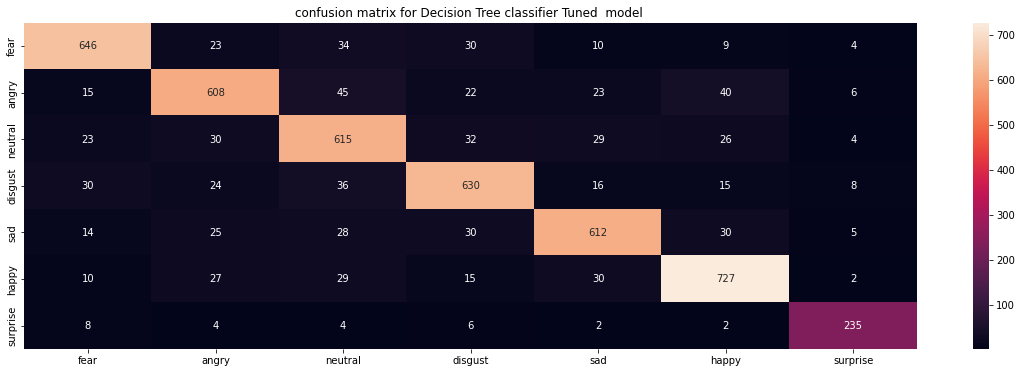

In [ ]:
# Confusion matrix of DTC Tuned model
conf=confusion_matrix(y_test,y_pred8)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for Decision Tree classifier Tuned  model ')
plt.show()

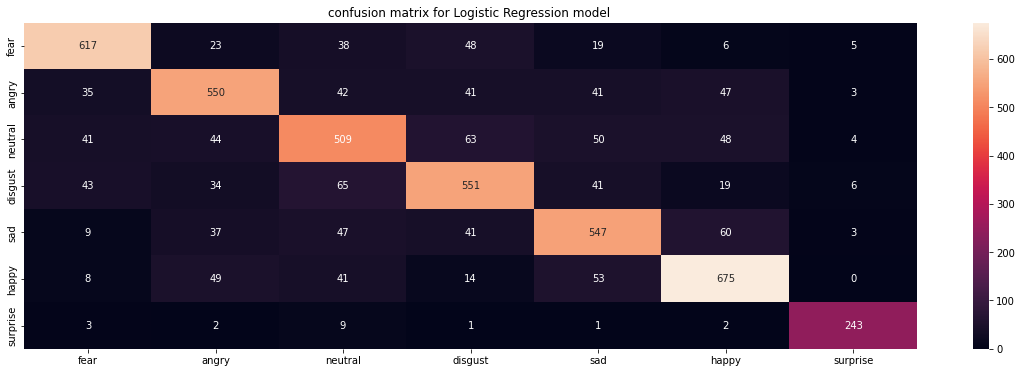

In [ ]:
# Confusion matrix of LR model
conf=confusion_matrix(y_test,y_pred9)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for Logistic Regression model ')
plt.show()

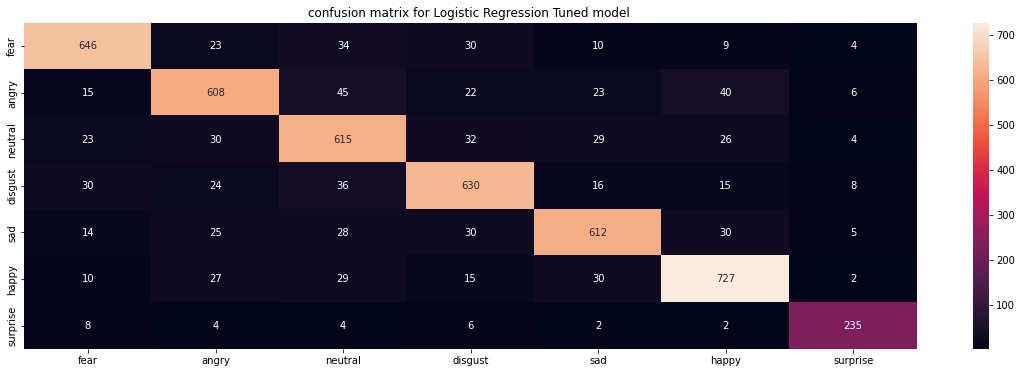

In [ ]:
# Confusion matrix of LR Tuned model
conf=confusion_matrix(y_test,y_pred10)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for Logistic Regression Tuned model ')
plt.show()

In [ ]:
# Label encoder for emotion classes
lb=LabelEncoder()
Y1=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y1

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.7, random_state=1, stratify = Y,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3657, 3024), (8536, 3024), (3657, 7), (8536, 7))

In [ ]:
# Scalar initalization for train and test data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [ ]:
y_pred11= CNN_model.predict(X_test)
cnn_pred = []
for i in y_pred11:
  j = np.argmax(i)
  cnn_pred.append(j)
cnn_pred = np.array(cnn_pred)
cnn_pred

array([6, 1, 2, ..., 1, 1, 1])

In [ ]:
# predictions from CNN tuned model
y_pred12= CNN_tuned_model.predict(X_test)
CNN_tuned_model_pred = []
for i in y_pred12:
  j = np.argmax(i)
  CNN_tuned_model_pred.append(j)
CNN_tuned_model_pred = np.array(CNN_tuned_model_pred)
CNN_tuned_model_pred

267/267 [==============================] - 455s 2s/step


array([6, 3, 3, ..., 1, 0, 1])

In [ ]:
# Preparing y_check from y_test for comparision purpose
y_check=np.argmax(y_test,axis=1)
y_check

array([6, 4, 3, ..., 1, 1, 1])

In [ ]:
# Classification report of CNN model
print(f'CNN Model Classification Report: \n\n',classification_report(y_check,cnn_pred,target_names=emotion_names))

CNN Model Classification Report: 

               precision    recall  f1-score   support

        fear       0.75      0.79      0.77      1323
       angry       0.46      0.78      0.58      1327
     neutral       0.51      0.78      0.62      1329
     disgust       0.92      0.24      0.38      1327
         sad       0.66      0.59      0.62      1303
       happy       0.87      0.48      0.62      1470
    surprise       0.79      0.92      0.85       457

    accuracy                           0.62      8536
   macro avg       0.71      0.65      0.63      8536
weighted avg       0.70      0.62      0.61      8536



In [ ]:
# Classification report of CNN tuned model
print(f'CNN Tuned Model Classification Report:\n\n',classification_report(y_check,CNN_tuned_model_pred,target_names=emotion_names))

CNN Tuned Model Classification Report:

               precision    recall  f1-score   support

        fear       0.92      0.71      0.80      1323
       angry       0.82      0.74      0.78      1327
     neutral       0.72      0.79      0.75      1329
     disgust       0.63      0.83      0.72      1327
         sad       0.86      0.75      0.80      1303
       happy       0.80      0.81      0.81      1470
    surprise       0.89      0.87      0.88       457

    accuracy                           0.78      8536
   macro avg       0.80      0.79      0.79      8536
weighted avg       0.79      0.78      0.78      8536



In [ ]:
# Importing history of CNN and CNN tuned models
df1 = pd.read_csv(r'//content/gdrive/MyDrive/Data 606 Project/Project/CNN Models Training History/history1.csv')
df2 = pd.read_csv(r'/content/gdrive/MyDrive/Data 606 Project/Project/CNN Models Training History/history2.csv')

In [ ]:
# Traininng accuracy for CNN model
fig=px.line(df1, y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'Trarining and Validation Accuracy Chart for CNN model')
plt.figure(figsize=(20,6))
fig.show()

<Figure size 1440x432 with 0 Axes>

In [ ]:
# Training loss for CNN model
fig=px.line(df1, y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'Training and Validation Loss Chart for CNN model')
fig.show()

In [ ]:
# Training accuracy for CNN tuned model
fig=px.line(df2, y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'Trarining and Validation Accuracy Chart of CNN tuned model')
plt.figure(figsize=(20,6))
fig.show()

<Figure size 1440x432 with 0 Axes>

In [ ]:
# Training loss for CNN tuned model
fig=px.line(df1, y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'Training and Validation Loss Chart of CNN tuned model')
fig.show()

In [ ]:
#Accuracy score for CNN model
accuracy=accuracy_score(cnn_pred,y_check)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of CNN  Model: {accuracy}')

Accuracy Score of CNN  Model: 0.6245313964386129


In [ ]:
# Accuracy score for CNN tuned model
accuracy=accuracy_score(CNN_tuned_model_pred,y_check)
models_accuracy_scores.append(accuracy)
print(f'Accuracy Score of CNN Tuned Model: {accuracy}')

Accuracy Score of CNN Tuned Model: 0.7791705716963448


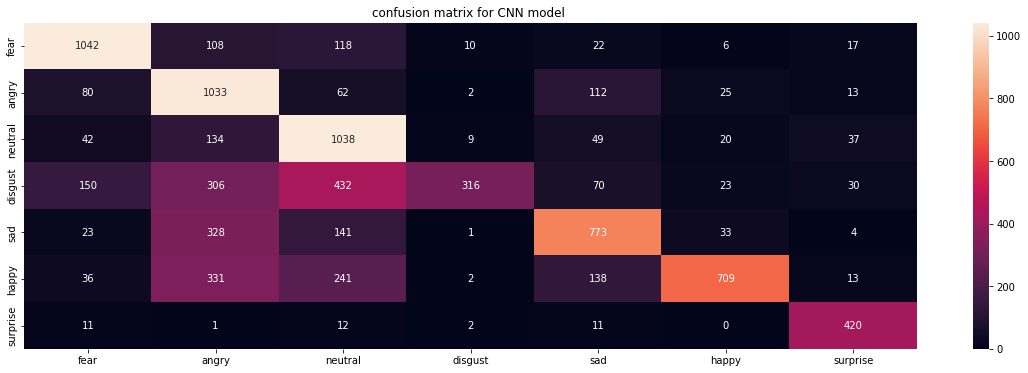

In [ ]:
# Confusion matrix of CNN model
conf=confusion_matrix(y_check,cnn_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for CNN model ')
plt.show()

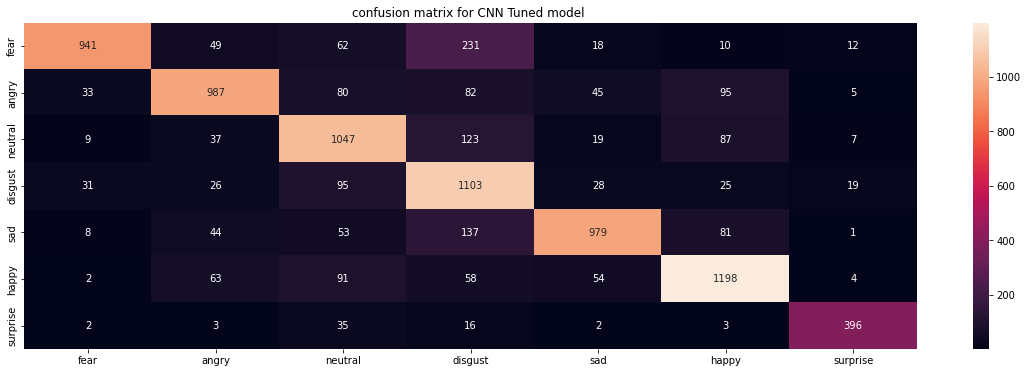

In [ ]:
# Confusion matrix of CNN tuned model
conf=confusion_matrix(y_check,CNN_tuned_model_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,6))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for CNN Tuned model ')
plt.show()

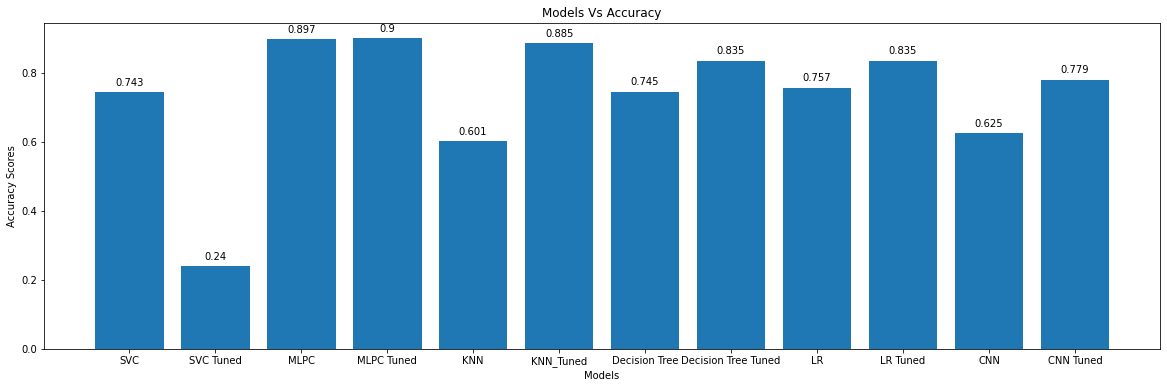

In [ ]:
# Models vs accuracy chart
def addlabels(x,y):
	for i in range(len(x)):
		plt.text(i, y[i]+0.02, round(y[i],3), ha = 'center')

if __name__ == '__main__':
	plt.figure(figsize = (20,6))
	plt.bar(model_names, models_accuracy_scores)
	addlabels(model_names, models_accuracy_scores)
	plt.title("Models Vs Accuracy")
	plt.xlabel("Models")
	plt.ylabel("Accuracy Scores")
	plt.show()
